<a href="https://colab.research.google.com/github/AhmedAnasHaouari/sales-predictions/blob/main/Sales%20Prediction%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **PROJECT 1** (Final):

- Haouari Ahmed Anas

- 05/11/2023

# Imports :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(transform_output='pandas')

# Loading Data and making a copy (To avoid data leakage) :

In [3]:
filename = "/content/drive/MyDrive/datasets/sales_predictions_2023.csv"
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df2 = df.copy()

# Exploring and cleaning Data :

- Exloring rows/columns :

In [5]:
df.shape

(8523, 12)

- Cheking data infos and types:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Looking for duplicates :

In [7]:
df.duplicated().sum()

0

There are no duplicates in this dataframe

- Missing values :

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The ‘Item_Weight’ column has 1463 missing values, the ‘Outlet_Size’ column has 2410 missing values

- Fixing Inconsistencies :

Categorical :

In [9]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [11]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')


Numerical :

In [16]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


- Adressing missing values :

The ‘Item_Weight’ column has 1463 missing values, the ‘Outlet_Size’ column has 2410 missing values.

For Item wieght we can fill in missing values using the mean and for the Outlet size we can impute the missing values with the most occured category : Medium.

In [17]:
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [18]:
df['Outlet_Size'].fillna('Medium', inplace=True)

# Visualizing Data :

In [19]:
plt.style.use(['dark_background', 'seaborn-poster'])
import matplotlib.gridspec as gridspec

<ipython-input-19-15fc5720210f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background', 'seaborn-poster'])


<ipython-input-20-3fd6b815bca1>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


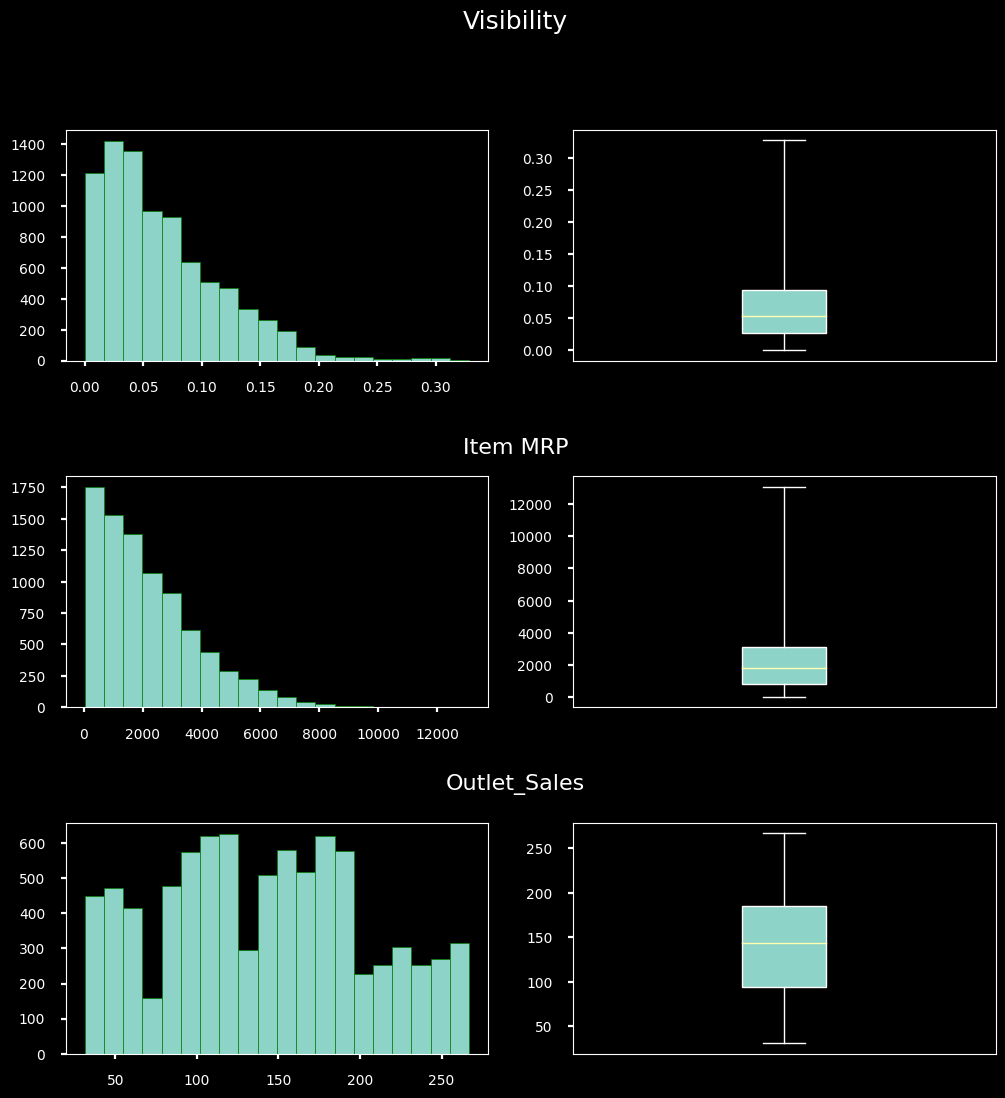

In [20]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[2, 0])
ax6 = plt.subplot(gs[2, 1])

ax1.hist(data=df, x='Item_Visibility', bins=20, edgecolor='green' )
ax1.tick_params(axis='both', which='both', labelsize=10)

ax2.boxplot(df['Item_Visibility'], vert=True, whis= (0, 100), widths = .2, patch_artist=True)
ax2.tick_params(axis='both', which='both', labelsize=10)
ax2.set_xticks([])

plt.suptitle('Visibility', fontsize = 18)
ax3.hist(data=df, x='Item_Outlet_Sales', bins=20, edgecolor='green' )
ax3.tick_params(axis='both', which='both', labelsize=10)

ax4.boxplot(df['Item_Outlet_Sales'], vert=True, whis= (0, 100), widths = .2, patch_artist=True)
ax4.set_xticks([])
ax4.tick_params(axis='both', which='both', labelsize=10)

ax5.hist(data=df, x='Item_MRP', bins=20, edgecolor='green' )
ax5.tick_params(axis='both', which='both', labelsize=10)

ax6.boxplot(df['Item_MRP'], vert=True, whis= (0, 100), widths = .2, patch_artist=True)
ax6.tick_params(axis='both', which='both', labelsize=10)
ax6.set_xticks([])

fig.text(0.5, 0.33, 'Outlet_Sales', fontsize=16, ha='center')
fig.text(0.5, 0.61, 'Item MRP', fontsize=16, ha='center')

gs.update(hspace=0.5, wspace = 0.2 )


plt.tight_layout()


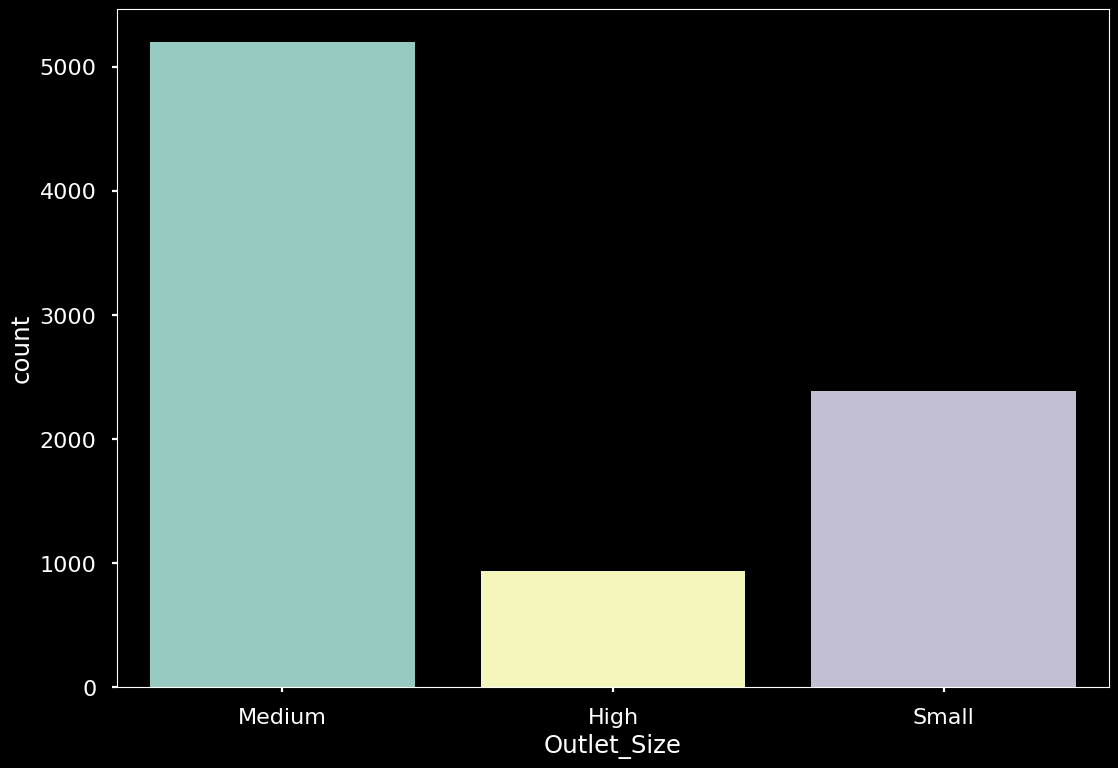

In [21]:
ax = sns.countplot(data = df, x = 'Outlet_Size')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

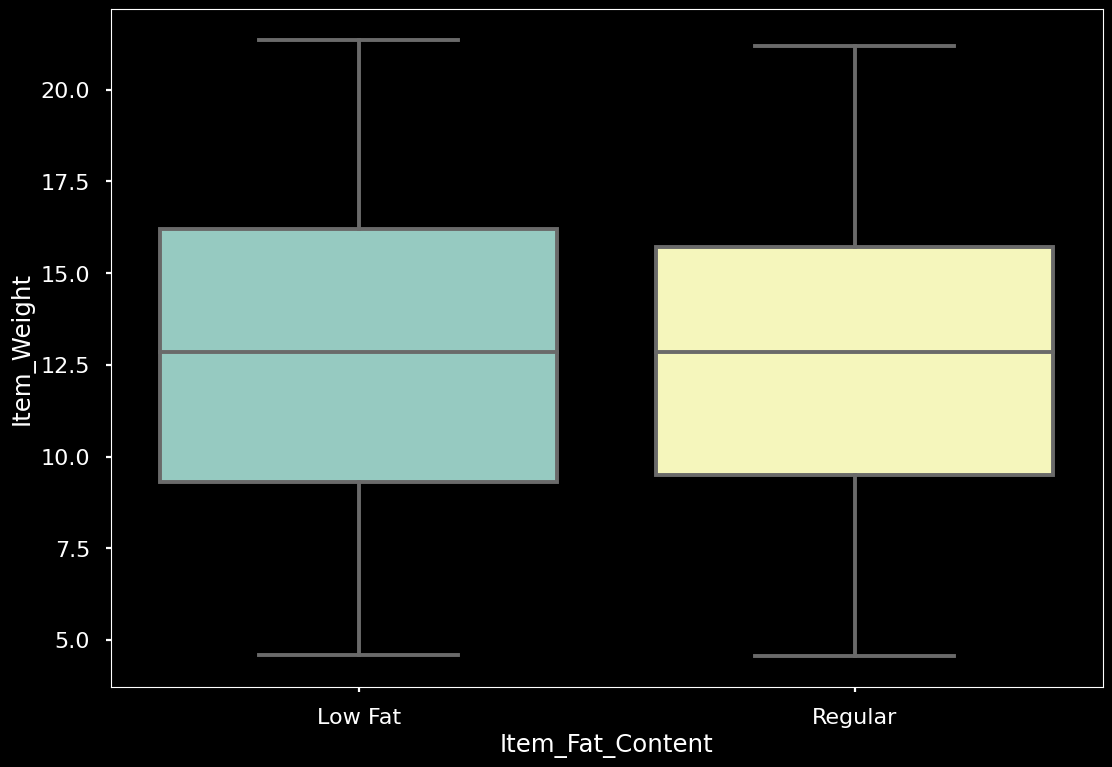

In [22]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

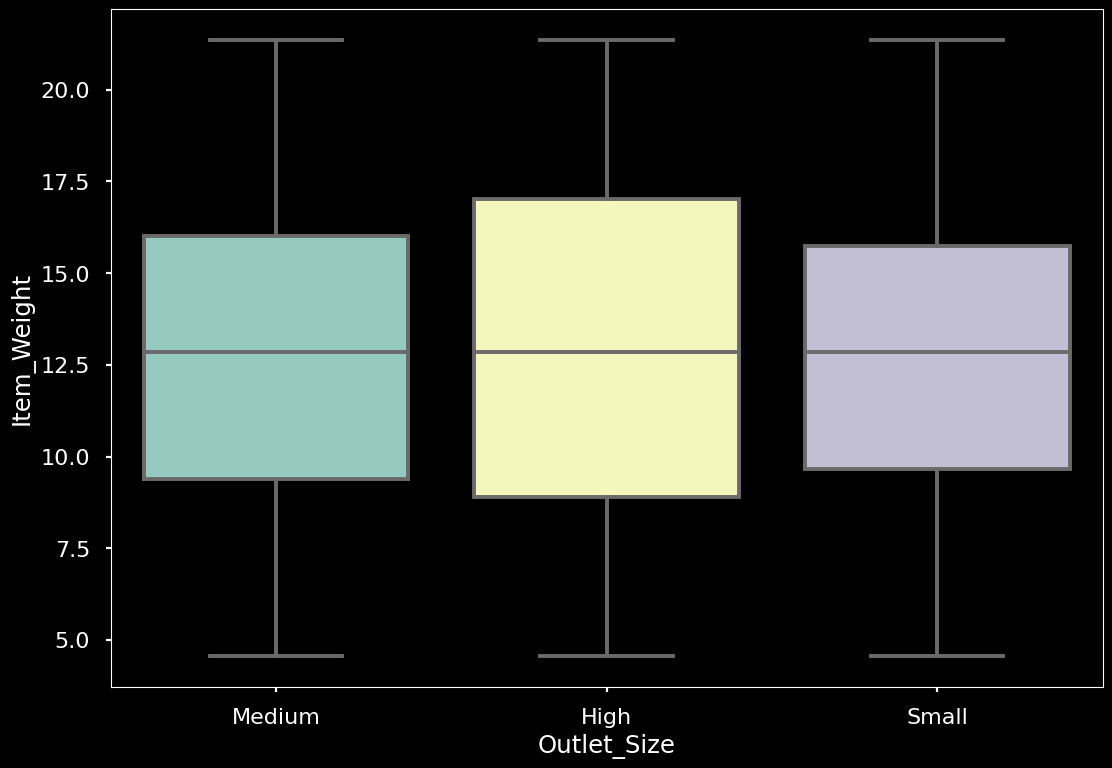

In [23]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Weight')

Text(0, 0.5, 'Outlet sales')

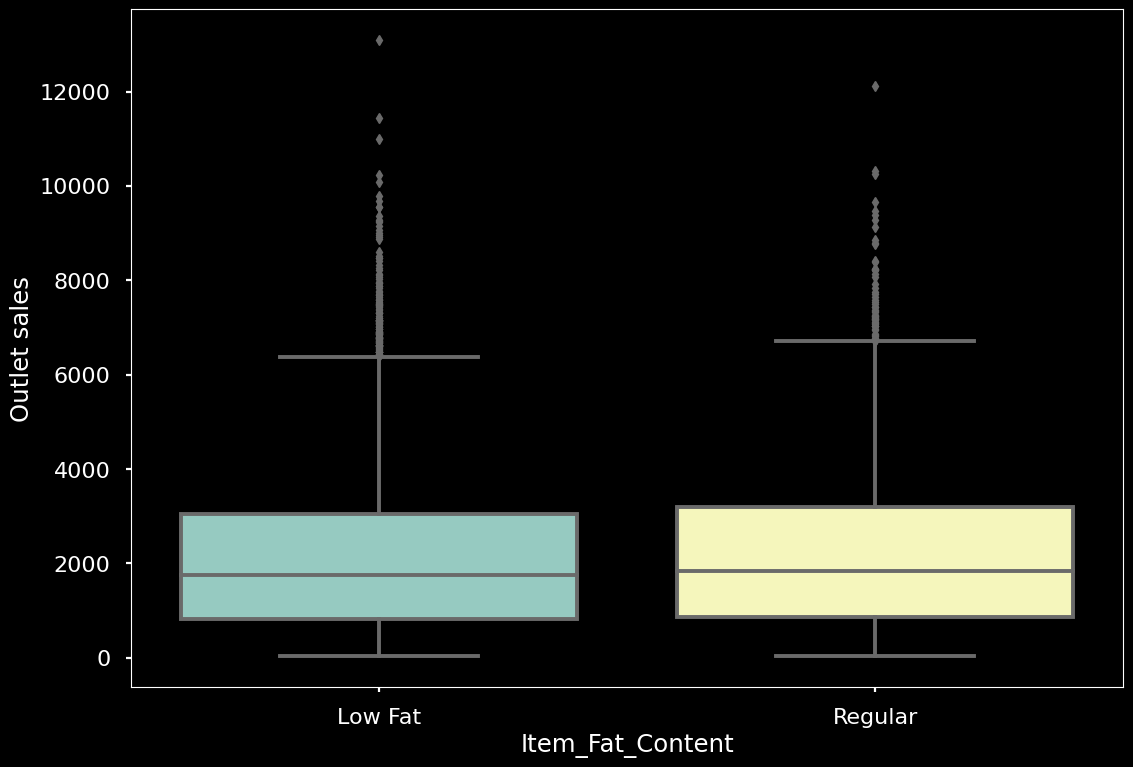

In [24]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.ylabel('Outlet sales')

Axes(0.125,0.11;0.775x0.77)


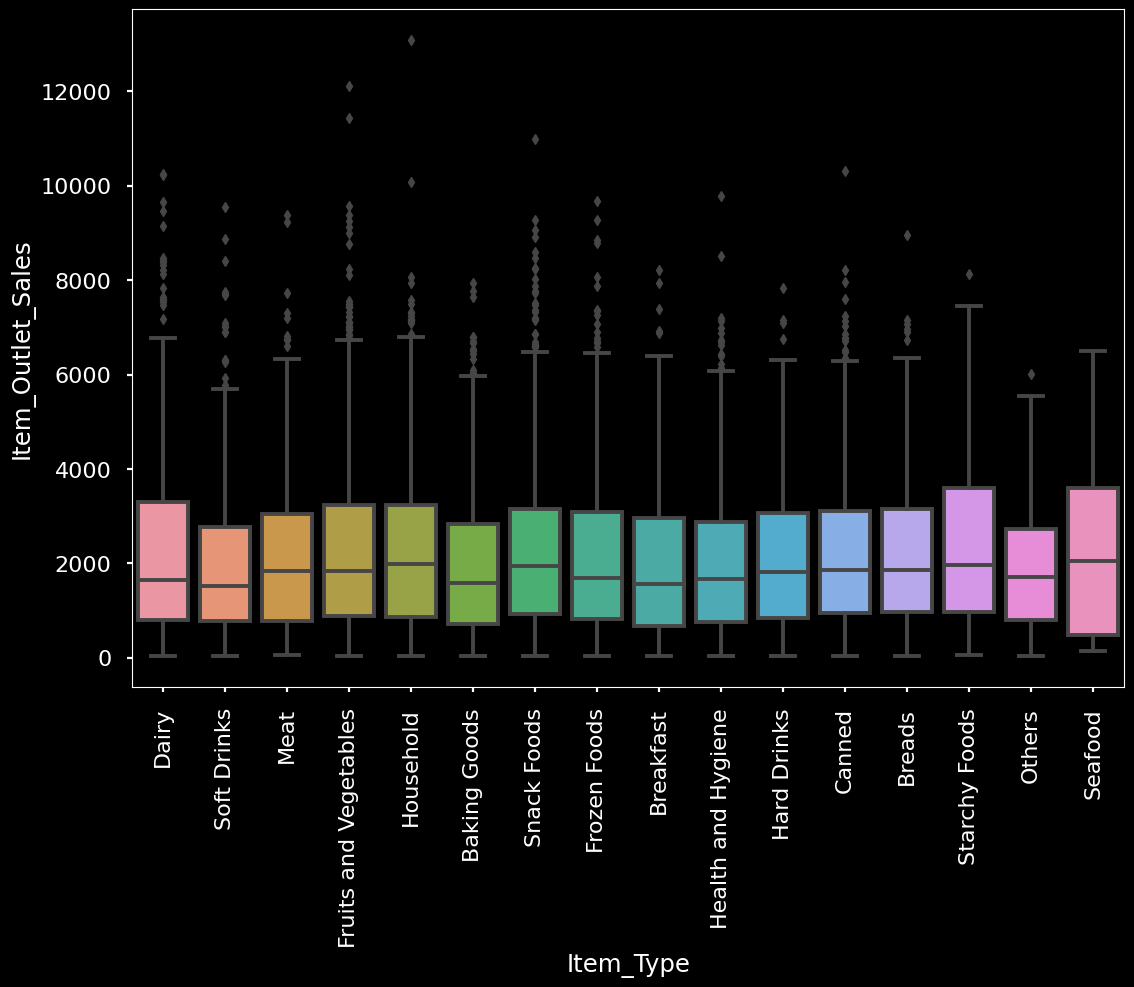

In [25]:
fig5 = sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=90)
print(fig5)

<ipython-input-26-00491ccd23a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

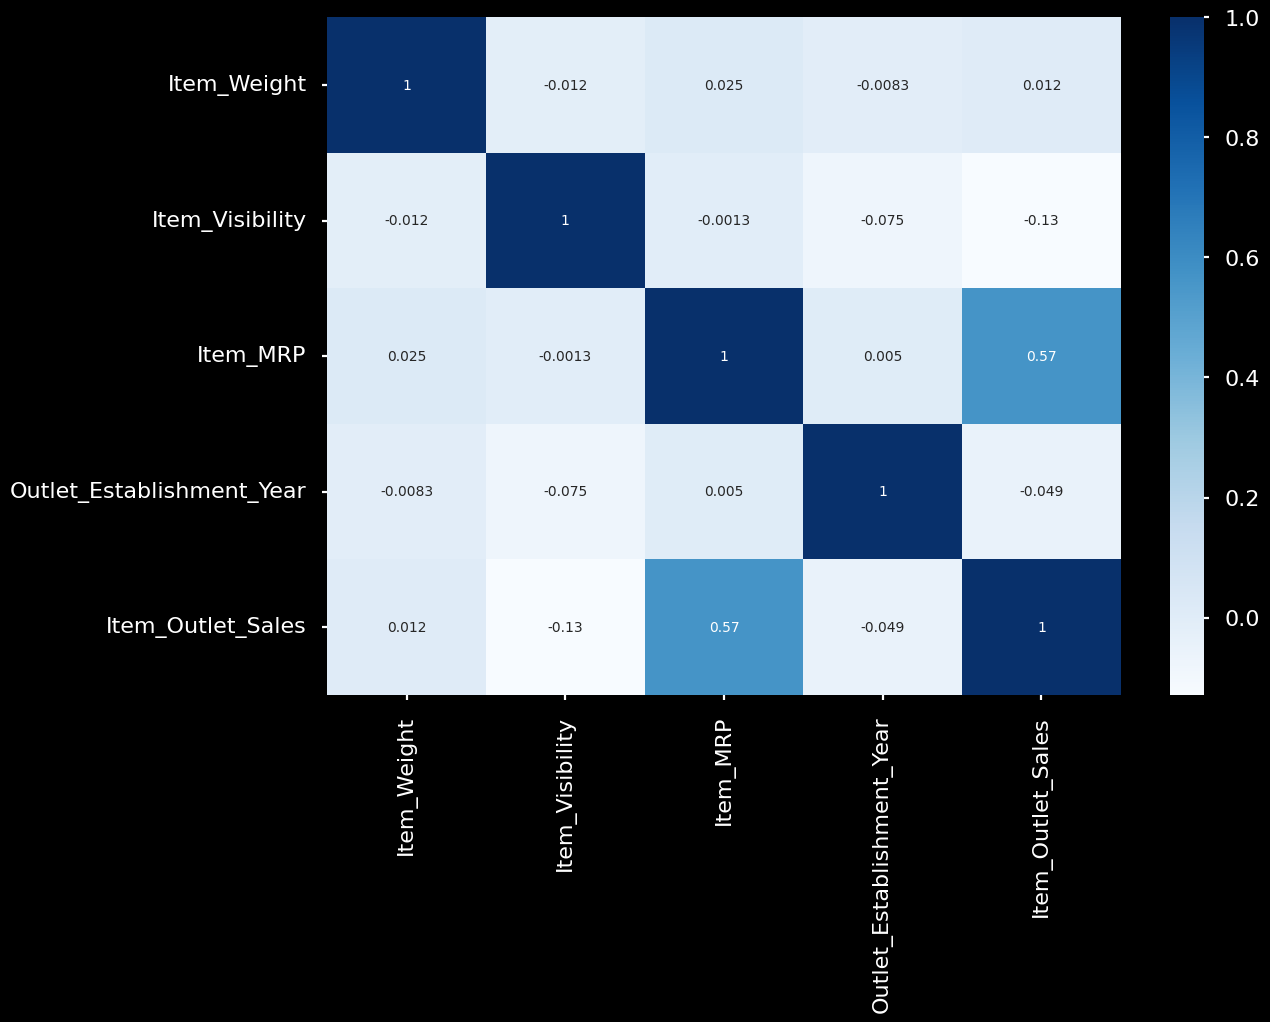

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# Explanatory Visuals & Analysis

- Sales by Types, Fat Content, Outlet Size and Outlet Location :

In [27]:
means1 = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2 = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means3 = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means4 = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

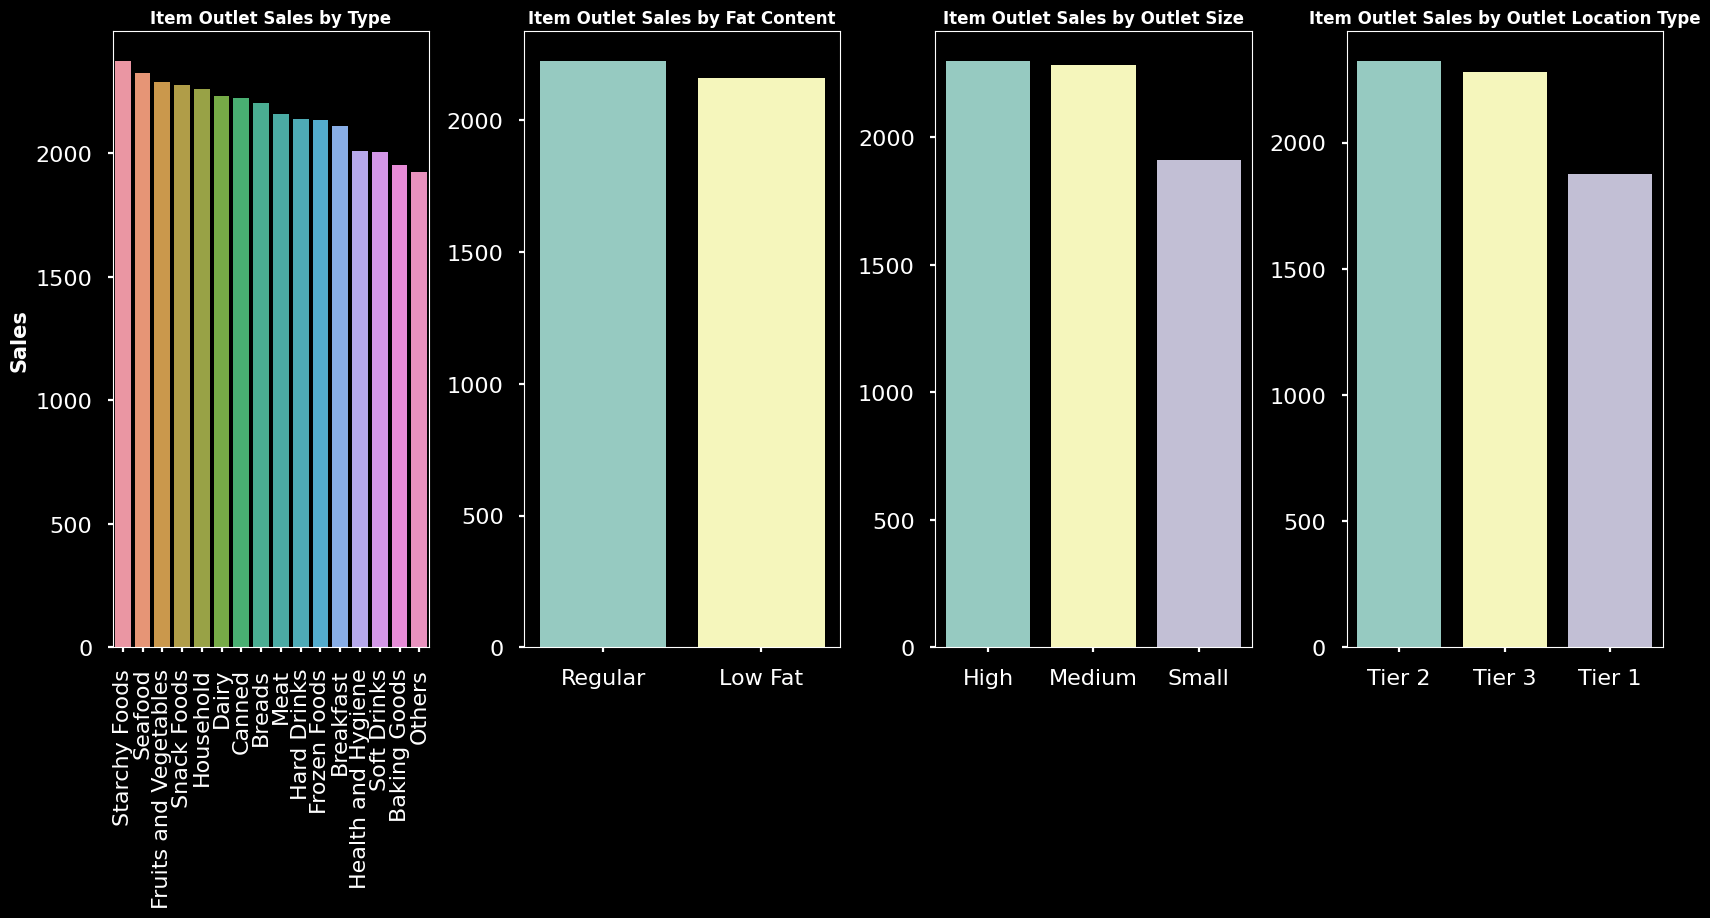

In [28]:
fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(1, 4)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[0, 3])

sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means1.index, errorbar=None, ax=ax1)
ax1.set_title('Item Outlet Sales by Type', fontsize = 12, fontweight = 'bold');
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('')
ax1.set_ylabel('Sales', fontsize = 15, fontweight = 'bold');

sns.barplot(data=df, x='Item_Fat_Content', y = 'Item_Outlet_Sales', order = means2.index, errorbar=None, ax=ax2)
ax2.set_title('Item Outlet Sales by Fat Content', fontsize = 12, fontweight = 'bold');
ax2.set_xlabel('')
ax2.set_ylabel('')

sns.barplot(data=df, x='Outlet_Size', y = 'Item_Outlet_Sales', order = means3.index, errorbar=None, ax=ax3)
ax3.set_title('Item Outlet Sales by Outlet Size', fontsize = 12, fontweight = 'bold');
ax3.set_xlabel('')
ax3.set_ylabel('')

sns.barplot(data=df, x='Outlet_Location_Type', y = 'Item_Outlet_Sales', order = means4.index, errorbar=None, ax=ax4)
ax4.set_title('Item Outlet Sales by Outlet Location Type', fontsize = 12, fontweight = 'bold');
ax4.set_xlabel('')
ax4.set_ylabel('')

plt.subplots_adjust(wspace=0.3)

- Trend of sales by MRP

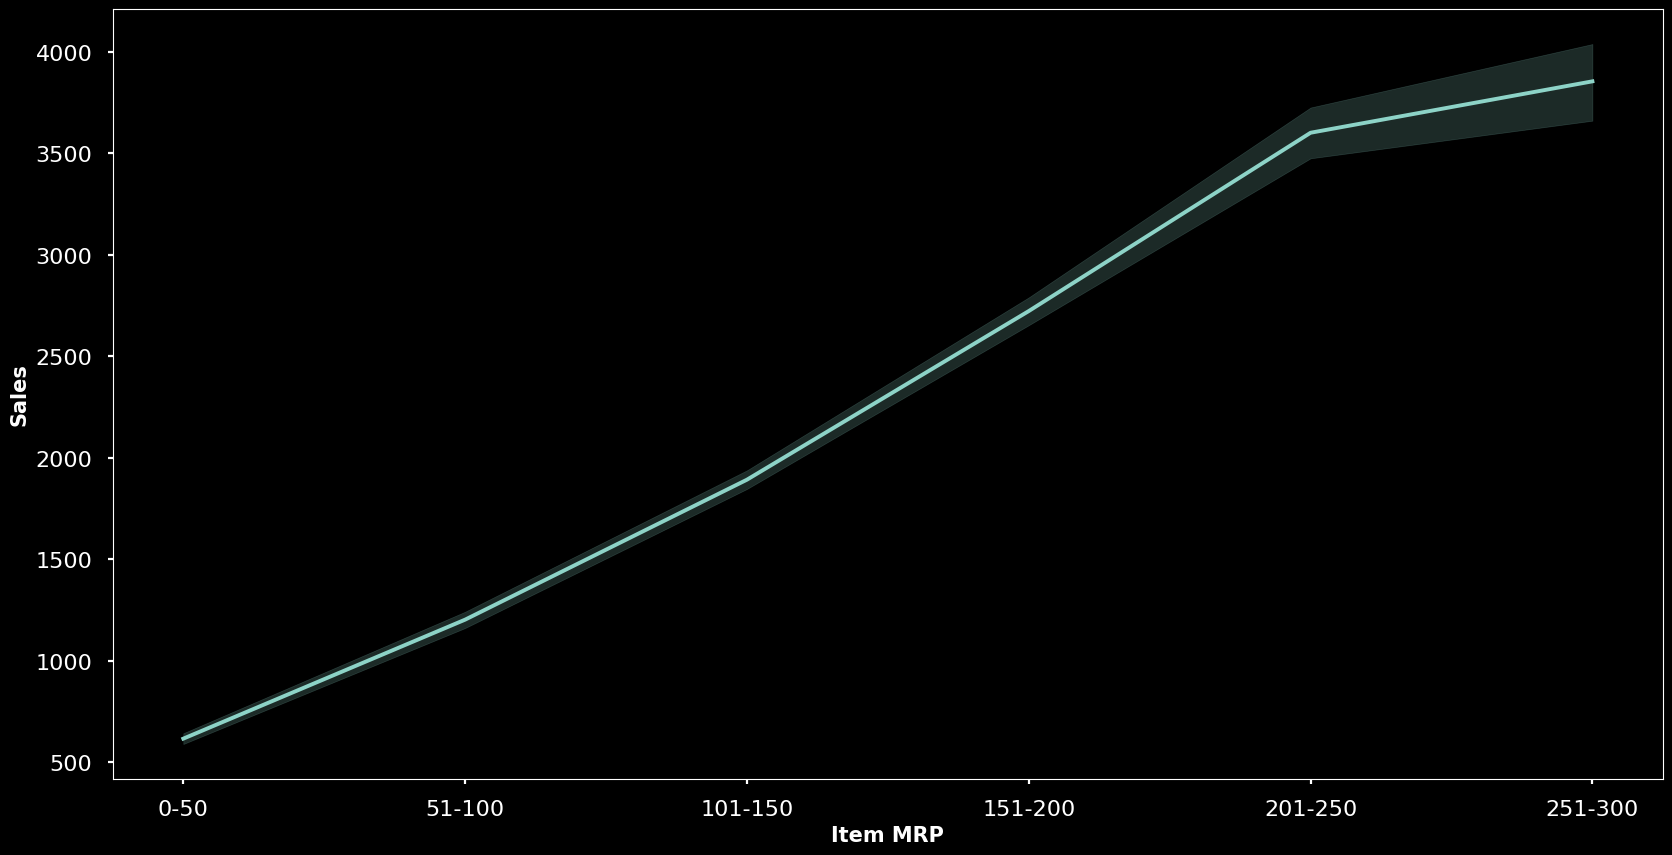

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
intervals = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
df['Intervalle'] = pd.cut(df['Item_MRP'], bins=intervals, labels=labels)
ax = sns.lineplot(data=df,x = 'Intervalle', y = 'Item_Outlet_Sales')
ax.set_title('', fontsize = 20, fontweight = 'bold');


ax.set_xlabel('Item MRP', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Sales', fontsize = 15, fontweight = 'bold');


# Preprocessing :

- Preparing Data :

In [30]:
df_copy = df2.drop(columns=['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [31]:
df_copy['Item_Fat_Content'] = df_copy['Item_Fat_Content'].replace('LF', 'Low Fat')
df_copy['Item_Fat_Content'] = df_copy['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_copy['Item_Fat_Content'] = df_copy['Item_Fat_Content'].replace('reg', 'Regular')

- Defining X and y

In [32]:
X = df_copy.drop(columns='Item_Outlet_Sales')
y = df_copy['Item_Outlet_Sales']

- Train test split the data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
X_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
dtype: object

- Selecting data :

In [35]:
num_df = make_column_selector(dtype_include='number')
cat_df = make_column_selector(dtype_include='object')

- Creating numeric data tuple :

In [36]:
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [37]:
num_tuple = ('numeric', num_pipe, num_df)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7bb4d088f7f0>)

- Creating categorical data tuple :

In [38]:
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [39]:
cat_tuple = ('categorical', ohe_pipe, cat_df)
cat_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7bb4d088d4e0>)

- Create a ColumnTransformer

In [40]:
col_transformer = ColumnTransformer([num_tuple, cat_tuple],
                                    verbose_feature_names_out=False)

# Fitting a Linear Regression Model

In [41]:
linreg = LinearRegression()

In [42]:
linreg_pipe = make_pipeline(col_transformer, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bb4d088f7f0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bb4d088d4e0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [43]:
linreg_pipe.fit(X_train, y_train)
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
training_predictions[:10]

array([3801.42564935, 2678.66418835, 2618.84023983, 1485.55299446,
       1946.37915181,  -67.25163323, 1595.89235171, 5680.46898672,
       4167.46575513, 2000.88404543])

- Function to Evaluate Model :

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
def evaluate_model(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)

  print(f'scores: MAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \
  \nR2: {r2:.2f}')

In [46]:
evaluate_model(y_train, training_predictions)

scores: MAE: 848.02 
MSE: 1,300,862.33 
RMSE: 1,140.55   
R2: 0.56


In [47]:
evaluate_model(y_test, test_predictions)

scores: MAE: 803.97 
MSE: 1,190,150.04 
RMSE: 1,090.94   
R2: 0.57


- Linear Regression Model Observations

  - This model performs very poorly on the training and testing set.
  - Most likely, this data is not well suited for a Linear Model.

# Fitting a Decision Tree Regressor Model

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree_pipe = make_pipeline(col_transformer, dec_tree)

In [50]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bb4d088f7f0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bb4d088d4e0>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [51]:
train_tree = dec_tree_pipe.predict(X_train)
test_tree = dec_tree_pipe.predict(X_test)

In [52]:
evaluate_model(y_train, train_tree)

scores: MAE: 0.00 
MSE: 0.00 
RMSE: 0.00   
R2: 1.00


In [53]:
evaluate_model(y_test, test_tree)

scores: MAE: 1,060.82 
MSE: 2,346,918.18 
RMSE: 1,531.97   
R2: 0.15


- Untuned Decision Tree Model Observations :

  - This model performs extremely well on the training data. However, it performs poorly on the testing data.
  - This model is definitely overfit and will need tuning.

# Fitting a Tuned Decision Tree Regressor Model

In [54]:
dec_tree.get_depth()

36

In [55]:
depths = list(range(2, 36))

In [56]:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

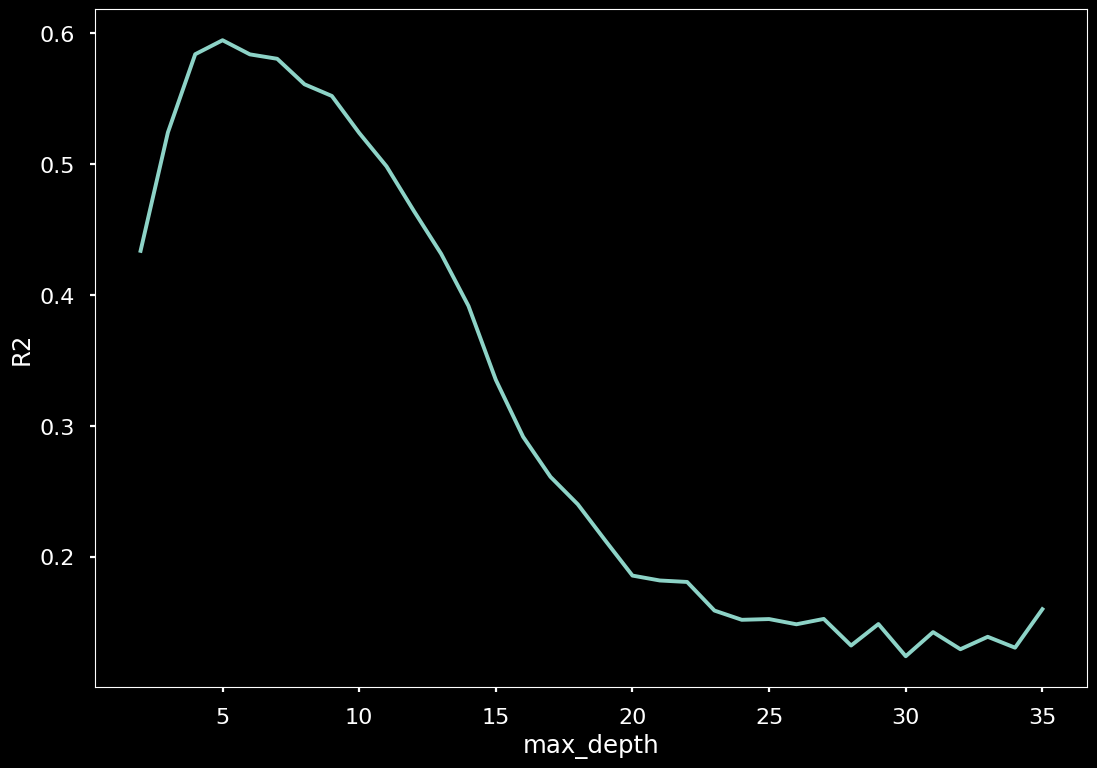

In [57]:
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(col_transformer, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)

    train_preds = dec_tree_pipe.predict(X_train)
    test_preds = dec_tree_pipe.predict(X_test)

    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)

    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [58]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.594703,0.60394
4,0.584005,0.582625
6,0.583899,0.614837
7,0.580522,0.626662
8,0.561026,0.644511


- Tuned Decision Tree Model by Max Depth :
  - Tuning the max depth on the decision tree model improved the results for the testing data.
  - The model still perform poorly.

# Overall Recommendation :

Recommended Model : Tuned Random Forest Regressor Model.

There was still some bias in the model, but by far it outperformed the linear regression model. Other types of models can be explored to see how they perform.